In [1]:
import json

path = "../dataset/experiment3/processed/experiment3_comparison_openai.jsonl"

dat: list[dict[str, str | int]] = []
with open(path, 'r') as f:
    for line in f:
        dat.append(json.loads(line))

In [2]:
dat_by_id: dict[int, list] = {}
for d in dat:
    p, i, j = map(int, d['id'].split(", "))
    if p not in dat_by_id:
        dat_by_id[p] = []
    dat_by_id[p].append((i, j) if d['result'] == 1 else (j, i))

In [3]:
print(dat_by_id[0])

[(0, 1), (0, 2), (0, 3), (4, 0), (0, 5), (0, 6), (0, 7), (8, 0), (0, 9), (1, 2), (1, 3), (4, 1), (5, 1), (1, 6), (1, 7), (8, 1), (1, 9), (2, 3), (4, 2), (5, 2), (2, 6), (2, 7), (8, 2), (9, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (4, 5), (4, 6), (4, 7), (8, 4), (4, 9), (5, 6), (5, 7), (8, 5), (5, 9), (7, 6), (8, 6), (9, 6), (8, 7), (9, 7), (8, 9)]


[(3, 9)] [(1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (4, 3), (3, 5), (3, 6), (7, 3), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (6, 5), (7, 5), (8, 5), (9, 5), (7, 6), (6, 8), (9, 6), (7, 8), (9, 7), (9, 8)]


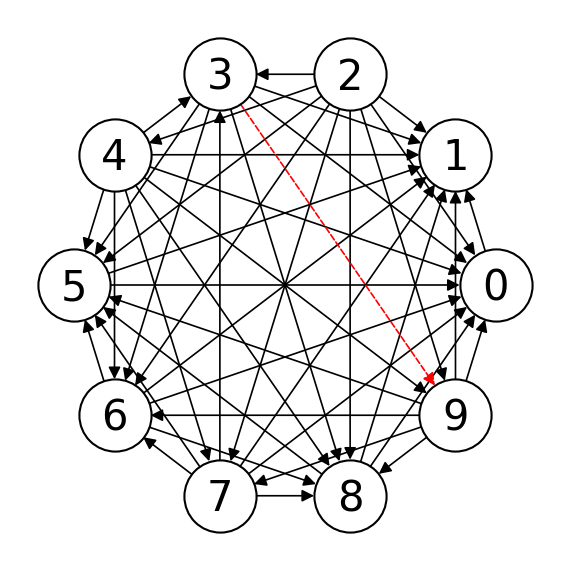

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from src.utils.utility import remove_cycles_kahn, add_transitive_edges, remove_cycles_expodential

edges = dat_by_id[40]
adj = [[] for _ in range(max(u for u, _ in edges) + 1)]
for u, v in edges:
    adj[u].append(v)

new_adj = remove_cycles_expodential(adj)
new_edges = [(u, v) for u, vs in enumerate(new_adj) for v in vs]

# adj = add_transitive_edges(new_adj)
# edges = [(u, v) for u, vs in enumerate(adj) for v in vs]


# 방향 그래프 생성
G = nx.DiGraph()
G.add_edges_from(edges)

# 시각화 설정
plt.figure(figsize=(2, 2), dpi=300)
pos = nx.circular_layout(G)

# --- 간선 분류 ---
removed_edges = [e for e in edges if e not in new_edges]
kept_edges = [e for e in edges if e in new_edges]

print(removed_edges, kept_edges)

# --- 노드 및 간선 그리기 ---
nx.draw_networkx_nodes(
    G,
    pos,
    node_color="white",      # 내부 색상
    edgecolors="black",      # 테두리 색상
    linewidths=0.5,          # 테두리 두께 (조절 가능)
)
label_pos = {k: (x, y - 0.015) for k, (x, y) in pos.items()}  # y값만 살짝 아래로 (-)
labels = {
    0: "1",
    1: "0",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
nx.draw_networkx_labels(G, label_pos, font_size=10, labels=labels)

# 남은 간선 (정상)
nx.draw_networkx_edges(G, pos, edgelist=kept_edges, edge_color="black", arrows=True, width=0.4, arrowsize=6)

# 제거된 간선 (빨간색, 점선)
nx.draw_networkx_edges(G, pos, edgelist=removed_edges, edge_color="red", style="dashed", arrows=True, width=0.4, arrowsize=6)

plt.axis("off")
plt.tight_layout()
from pathlib import Path
Path("../graphs/graph/g.png").parent.mkdir(parents=True, exist_ok=True)
plt.savefig("../graphs/graph/g6.pdf")

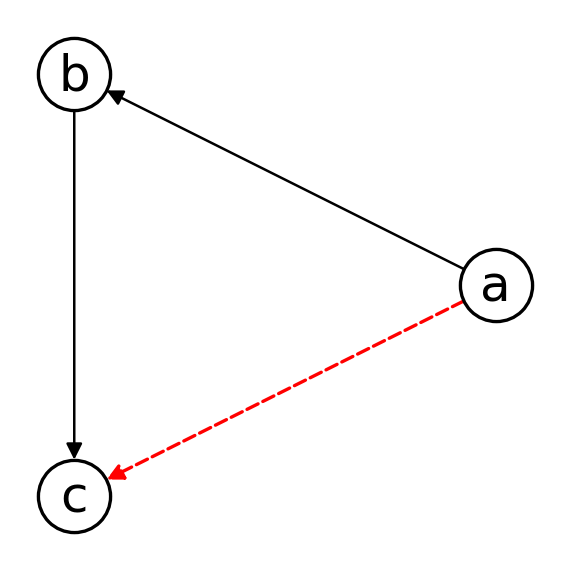

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# --- 그래프 정의 ---
G = nx.DiGraph()
black_edges = [("a" "b"), ("b", "c")]  # 기본 간선
red_edges   = [("a", "c")]              # transitive edge (빨간색 표시)

G.add_edges_from(black_edges + red_edges)

# --- 레이아웃 ---
plt.figure(figsize=(2, 2), dpi=300)
pos = nx.circular_layout(G)

# --- 노드 그리기 ---
nx.draw_networkx_nodes(
    G, pos,
    node_color="white",
    edgecolors="black",
    linewidths=0.8,
)

label_pos = {k: (x, y - 0.01) for k, (x, y) in pos.items()} 
nx.draw_networkx_labels(G, label_pos, font_size=12)

# --- 검은색 간선 ---
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=black_edges,
    edge_color="black",
    arrows=True,
    width=0.6,
    arrowsize=8,
)

# --- 빨간색 트랜지티브 간선 ---
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=red_edges,
    edge_color="red",
    style="dashed",
    arrows=True,
    width=0.8,
    arrowsize=8,
)

plt.axis("off")
plt.tight_layout()
plt.savefig("example_graph.png")
plt.show()
